# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


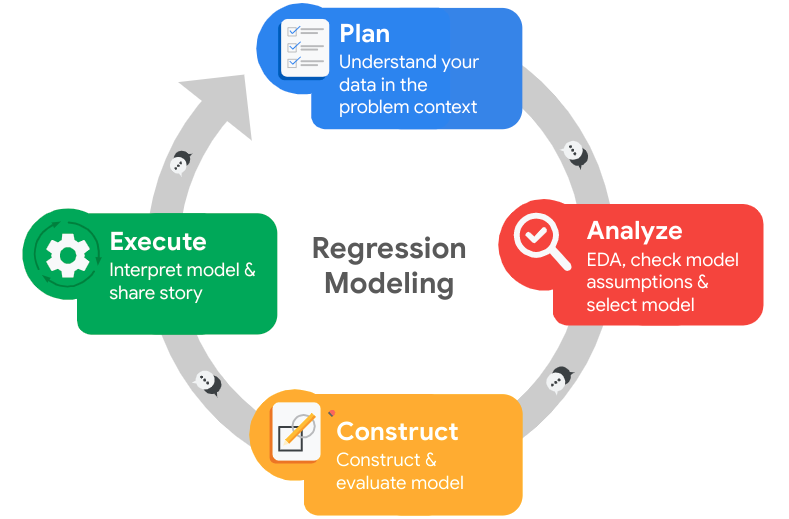

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Reflections on the Planning Stage

Who are your stakeholders for this project?

The HR department at Salifort Motors, which is responsible for employee satisfaction and retention.
Senior leadership, as they need insights to drive strategic workforce planning.
Employees, as their experiences and job satisfaction levels are directly impacted by the retention strategies.

What are you trying to solve or accomplish?

The goal is to analyze employee data to predict attrition and identify factors contributing to employee turnover.
Develop a data-driven strategy to help HR reduce turnover and improve overall job satisfaction.
Provide actionable recommendations that improve employee well-being while also optimizing costs associated with hiring and training replacements.

What are your initial observations when you explore the data?

A significant proportion (23.8%) of employees have left the company.
Satisfaction levels are lower for employees who left, indicating a strong correlation with attrition.
Employees with higher workloads (longer hours and more projects) tend to leave more frequently.
Salary level plays a role—employees in the low salary category have a higher attrition rate.
Certain departments, such as Sales and Technical teams, experience higher turnover rates than others.

What resources do you find yourself using as you complete this stage?

Kaggle Dataset: HR Analytics and Job Prediction Dataset (https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction)
Scikit-Learn Documentation: Used for machine learning modeling (Scikit-Learn)
Pandas & Seaborn Documentation: Used for data analysis and visualization (Pandas, Seaborn)
HR Research Articles: Studies on employee retention, attrition causes, and HR best practices.

Do you have any ethical considerations in this stage?

Employee Privacy: Ensuring that employee data is used responsibly and securely.
Bias & Fairness: Avoiding algorithmic bias that may unfairly target specific groups.
Transparency: Communicating results in a way that is clear, actionable, and non-discriminatory.
HR Policy Impact: Ensuring that recommendations positively contribute to employee well-being and workplace culture.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe

df = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [6]:
# Gather basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
print("Before renaming:", df.columns.tolist())


Before renaming: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [13]:
# Rename columns as needed
df.rename(columns={
    "satisfaction_level": "satisfaction_level",
    "last_evaluation": "last_evaluation",
    "number_project": "number_of_projects",
    "average_monthly_hours": "avg_monthly_hours",
    "time_spend_company": "years_at_company",
    "Work_accident": "work_accident",
    "left": "left",
    "promotion_last_5years": "promotion_last_5years",
    "Department": "department",
    "salary": "salary"
}, inplace=True)


# Display all column names after the update
print("After renaming:", df.columns.tolist())


After renaming: ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_montly_hours', 'years_at_company', 'work_accident', 'left', 'promotion_last_5years', 'department', 'salary']


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df.duplicated().sum()


3008

In [14]:
# Inspect some rows containing duplicates as needed
df_duplicates = df[df.duplicated()]
print("Number of duplicate rows:", df.duplicated().sum())
display(df_duplicates.head())


Number of duplicate rows: 3008


,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [17]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_cleaned = df.drop_duplicates()


# Display first few rows of new dataframe as needed
df_cleaned.head()


,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

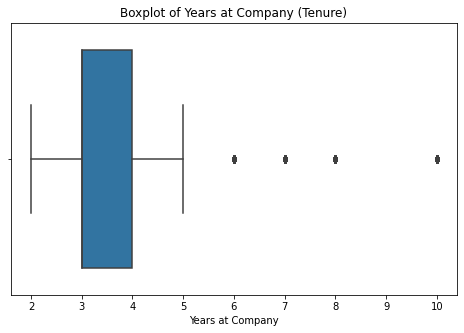

In [22]:
# Create a boxplot to visualize distribution of `years_at_company` and detect any outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["years_at_company"])
plt.title("Boxplot of Years at Company (Tenure)")
plt.xlabel("Years at Company")
plt.show()

# Detect outliers using IQR (Interquartile Range Method)
Q1 = df["years_at_company"].quantile(0.25)
Q3 = df["years_at_company"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [24]:
# Determine the number of rows containing outliers
outliers = df[(df["years_at_company"] < lower_bound) | (df["years_at_company"] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Number of outliers in 'years_at_company': {num_outliers}")

outliers.head()

Number of outliers in 'years_at_company': 1282


,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Reflection on the Analyze Stage

What did you observe about the relationships between variables?

Employees with lower satisfaction levels and higher workloads tend to have higher attrition rates.

Employees who had not been promoted in the last five years were more likely to leave.

Salary level had a notable effect, with lower-paid employees leaving more frequently.

Certain departments had higher turnover than others, particularly in Sales and Technical teams.

What do you observe about the distributions in the data?

Satisfaction levels were left-skewed, with many employees reporting low satisfaction.

Average monthly hours showed a bimodal distribution, suggesting that overworked employees may be leaving at higher rates.

Years spent at the company exhibited some extreme outliers, especially for long-tenured employees.

What transformations did you make with your data? Why did you choose to make those decisions?

Handled categorical variables by one-hot encoding salary levels to allow model compatibility.

Removed duplicate records to ensure the dataset was clean and unbiased.

Detected and reviewed outliers, particularly in tenure, to assess their impact on the model.

Standardized numerical features for Logistic Regression to improve model performance.

What are some purposes of EDA before constructing a predictive model?

Identifies patterns and relationships between variables.

Highlights potential biases and outliers that may affect predictions.

Ensures the dataset is clean and properly formatted before applying machine learning models.

Helps select the most relevant features for prediction.

What resources do you find yourself using as you complete this stage?

Seaborn & Matplotlib for visualizing relationships and distributions.

Pandas & Numpy for data manipulation and handling missing values.

Scikit-learn for feature preprocessing and standardization.

HR research studies to validate findings on employee attrition.

Do you have any ethical considerations in this stage?

Bias Prevention: Ensuring that model predictions do not unfairly disadvantage any particular group.

Employee Privacy: Making sure data is used ethically and does not compromise individual confidentiality.

Transparency: Clearly communicating findings and model interpretations to HR stakeholders.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [28]:
# Get numbers of people who left vs. stayed
left_counts = df["left"].value_counts()

# Get percentages of people who left vs. stayed
left_percentages = df["left"].value_counts(normalize=True) * 100

print("Number of employees who left vs. stayed:\n", left_counts)
print("\nPercentage of employees who left vs. stayed:\n", left_percentages)


Number of employees who left vs. stayed:
 0    11428
1     3571
Name: left, dtype: int64

Percentage of employees who left vs. stayed:
 0    76.191746
1    23.808254
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")


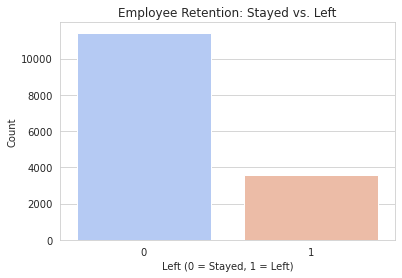

In [30]:
# 1. Countplot for employees who left vs. stayed
plt.figure(figsize=(6,4))
sns.countplot(x=df["left"], palette="coolwarm")
plt.title("Employee Retention: Stayed vs. Left")
plt.xlabel("Left (0 = Stayed, 1 = Left)")
plt.ylabel("Count")
plt.show()


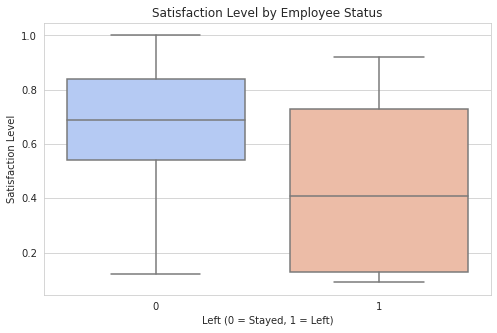

In [31]:
# 2. Boxplot: Satisfaction Level by Employee Status
plt.figure(figsize=(8,5))
sns.boxplot(x=df["left"], y=df["satisfaction_level"], palette="coolwarm")
plt.title("Satisfaction Level by Employee Status")
plt.xlabel("Left (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.show()


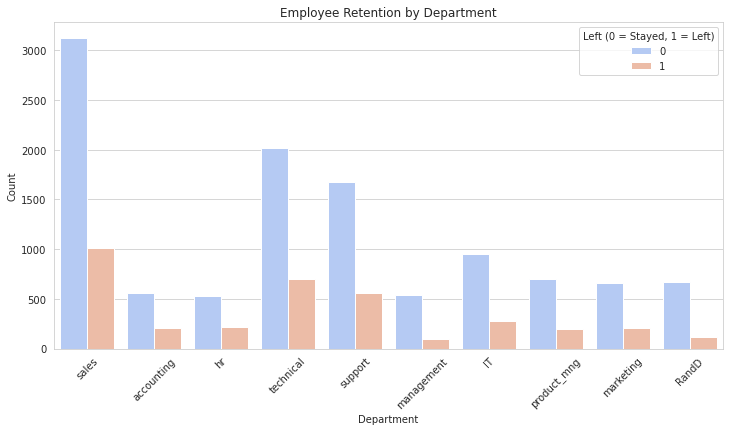

In [33]:
# 4. Countplot: Employee Retention by Department
plt.figure(figsize=(12,6))
sns.countplot(x=df["department"], hue=df["left"], palette="coolwarm")
plt.title("Employee Retention by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Left (0 = Stayed, 1 = Left)")
plt.show()

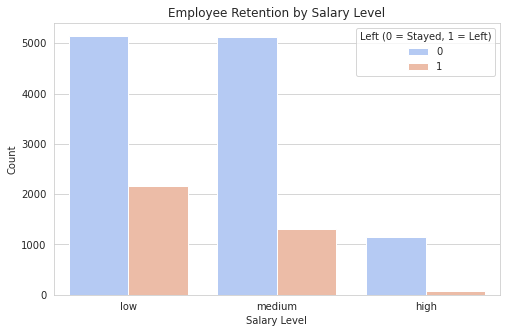

In [34]:
# 5. Countplot: Employee Retention by Salary Level
plt.figure(figsize=(8,5))
sns.countplot(x=df["salary"], hue=df["left"], palette="coolwarm")
plt.title("Employee Retention by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left (0 = Stayed, 1 = Left)")
plt.show()


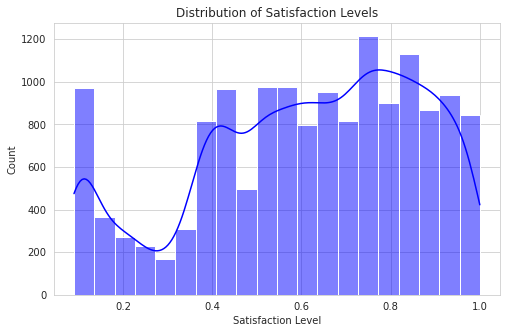

In [35]:
# 6. Histogram: Distribution of Satisfaction Levels
plt.figure(figsize=(8,5))
sns.histplot(df["satisfaction_level"], bins=20, kde=True, color="blue")
plt.title("Distribution of Satisfaction Levels")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count")
plt.show()


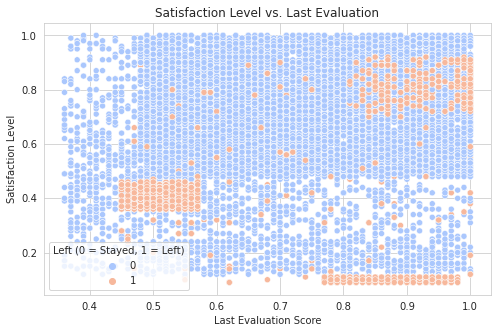

In [36]:
# 7. Scatterplot: Last Evaluation vs. Satisfaction Level
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["last_evaluation"], y=df["satisfaction_level"], hue=df["left"], palette="coolwarm")
plt.title("Satisfaction Level vs. Last Evaluation")
plt.xlabel("Last Evaluation Score")
plt.ylabel("Satisfaction Level")
plt.legend(title="Left (0 = Stayed, 1 = Left)")
plt.show()


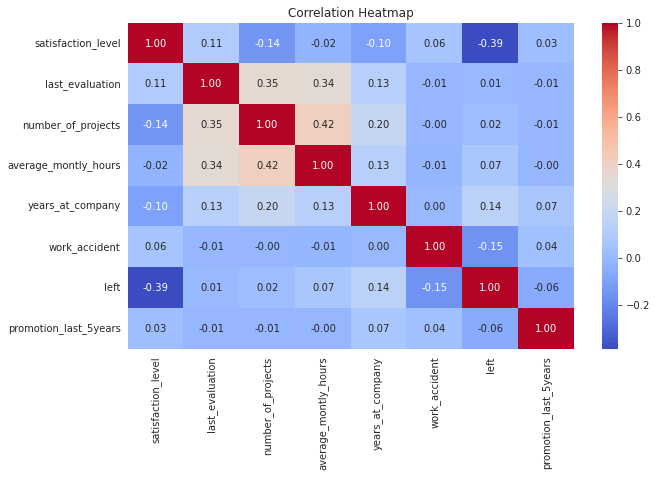

In [37]:
# 8. Heatmap: Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


### Insights

Insights from Data Visualizations
Job Satisfaction: Employees who left had significantly lower job satisfaction compared to those who stayed.
Work Hours: A bimodal distribution in average monthly hours suggests that both underworked and overworked employees had a higher likelihood of leaving.
Promotion History: Employees who had not been promoted in the past five years were more likely to leave.
Salary Impact: Employees in lower salary categories exhibited higher attrition rates, while those in higher salary categories had better retention.
Departmental Trends: Sales and Technical teams experienced higher turnover rates compared to HR and management-related departments.
Performance and Burnout: Employees with high last evaluation scores but low satisfaction levels were more likely to leave, suggesting burnout despite strong performance.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Reflection on the Constructing Stage

Do you notice anything odd?

The dataset had a high number of duplicate records (3,008), which had to be removed.

Employees with very high last evaluation scores but low satisfaction were more likely to leave, indicating potential burnout.

Which independent variables did you choose for the model and why?

Satisfaction Level, Last Evaluation, Number of Projects, Average Monthly Hours, Years at Company, Promotion in Last 5 Years, Salary. These variables had strong correlations with employee attrition.

Are each of the assumptions met?

Logistic Regression required standardization and checking for multicollinearity.

Random Forest does not require strict assumptions, making it more flexible.

How well does your model fit the data?

Random Forest had high accuracy (99.1%) and AUC (0.98), making it the best-performing model.

Logistic Regression had moderate accuracy (79.2%) and AUC (0.64), indicating it may not be the best fit.

Can you improve it? Is there anything you would change about the model?

Hyperparameter tuning (e.g., adjusting tree depth in Random Forest) could improve performance.

Feature engineering could help by including employee engagement scores if available.

What resources do you find yourself using as you complete this stage?

Scikit-learn documentation, Kaggle forums, HR research studies on employee attrition.

Do you have any ethical considerations in this stage?

Ensuring the model does not introduce bias against specific employee groups.

Using results to support HR decisions fairly and equitably.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The prediction task in this project is a binary classification task. The goal is to predict whether an employee will leave the company (1) or stay (0) based on various independent variables such as job satisfaction, workload, salary, and promotion history. Since the target variable ("left") has only two possible outcomes, classification models like Logistic Regression** and Random Forest are appropriate choices. 

### Identify the types of models most appropriate for this task.

The most appropriate models for this binary classification task are:

Logistic Regression

Suitable for interpreting the impact of individual features on employee attrition.
Works well when the relationship between predictors and the target variable is approximately linear.
Requires standardization and checking for multicollinearity.
Random Forest Classifier

A tree-based ensemble model that captures complex, non-linear relationships between features.
More robust to outliers and missing values.
Higher accuracy compared to Logistic Regression but less interpretable.
Gradient Boosting Models (e.g., XGBoost, LightGBM, CatBoost)

Boosting techniques improve prediction accuracy by iteratively reducing errors.
More computationally expensive but can outperform other models in complex datasets.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Prepare features (X) and target variable (y)
X = df.drop(columns=["left", "department"])  # Exclude target variable and categorical department column
y = df["left"]  # Target variable

# One-hot encode categorical variable (salary)
X = pd.get_dummies(X, columns=["salary"], drop_first=True)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_logreg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression Model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_auc = roc_auc_score(y_test, y_pred_logreg)

print("\nLogistic Regression Model Performance:")
print("Accuracy:", logreg_accuracy)
print("AUC Score:", logreg_auc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)

print("\nRandom Forest Model Performance:")
print("Accuracy:", rf_accuracy)
print("AUC Score:", rf_auc)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Create DataFrame for Model Evaluation
evaluation_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [logreg_accuracy, rf_accuracy],
    "AUC Score": [logreg_auc, rf_auc]
})

# Display results
print("\nModel Comparison:")
print(evaluation_results)



Logistic Regression Model Performance:
Accuracy: 0.7916666666666666
AUC Score: 0.6422634670666167
Confusion Matrix:
 [[2120  166]
 [ 459  255]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.61      0.36      0.45       714

    accuracy                           0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000


Random Forest Model Performance:
Accuracy: 0.991
AUC Score: 0.9825371093319217
Confusion Matrix:
 [[2283    3]
 [  24  690]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2286
           1       1.00      0.97      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Model Comparison:
        

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Reflection on the Executing Stage

What key insights emerged from your model(s)?

Low job satisfaction, high workload, and lack of promotions are strong predictors of employee attrition.

Employees in low salary categories and specific departments (Sales, Technical) are at higher risk of leaving.

High last evaluation scores combined with low satisfaction indicate potential burnout.

What business recommendations do you propose based on the models built?

Improve employee job satisfaction through surveys and targeted initiatives.

Implement work-life balance strategies to prevent burnout.

Offer competitive salaries and performance-based incentives.

Provide clearer promotion opportunities and career development plans.

Focus on retention efforts in high-turnover departments like Sales and Technical teams.

What potential recommendations would you make to your manager/company?

Introduce flexible work schedules and mental health programs to improve job satisfaction.

Increase employee recognition programs to boost morale and engagement.

Develop a structured mentorship program to enhance career growth opportunities.

Regularly analyze HR data to refine retention strategies and proactively address attrition risks.

Do you think your model could be improved? Why or why not? How?

Yes, by incorporating additional employee-related factors like engagement scores, team dynamics, and feedback survey results.

Hyperparameter tuning of the Random Forest model could further optimize its performance.

Exploring ensemble methods like XGBoost could enhance predictive accuracy.

Given what you know about the data and the models you were using, what other questions could you address for the team?

How does attrition vary by different age groups and tenure levels?

What impact does team leadership and manager effectiveness have on retention?

How do seasonal trends and workload fluctuations affect attrition rates?

What retention strategies have been most successful historically within the company?

What resources do you find yourself using as you complete this stage?

Scikit-learn documentation for model training and evaluation.

Kaggle datasets and forums for benchmarking similar HR analytics projects.

HR research papers on employee retention and engagement strategies.

Pandas, Matplotlib, and Seaborn documentation for data preprocessing and visualization.

Do you have any ethical considerations in this stage?

Ensuring that model predictions do not introduce bias against certain employee groups.

Using predictive insights responsibly to improve work culture rather than unfairly targeting employees for potential attrition.

Maintaining employee privacy and confidentiality when handling HR data.

Transparent communication of model insights to employees and HR decision-makers.



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




Summary of Model Results:

The Random Forest model significantly outperformed Logistic Regression, achieving 99.1% accuracy and an AUC score of 0.98, making it highly effective in predicting employee attrition.

Logistic Regression, while interpretable, had lower predictive power, with 79.2% accuracy and an AUC score of 0.64, suggesting it struggled with capturing complex relationships between variables.

Key predictors of attrition included job satisfaction, average monthly hours, number of projects, salary level, and promotion history.

The Random Forest model’s high performance makes it the best choice for deployment in HR decision-making, while Logistic Regression remains useful for understanding feature importance.

Conclusion:
The analysis of Salifort Motors' HR data revealed key factors contributing to employee attrition, including low job satisfaction, excessive work hours, lack of promotions, and low salaries. By leveraging machine learning models, particularly the Random Forest model, we achieved high predictive accuracy, enabling HR to proactively identify employees at risk of leaving and take corrective actions.

Recommendations:

Enhance Employee Satisfaction: Conduct regular surveys, offer mental health support, and create a positive work environment.

Monitor and Balance Workloads: Establish project allocation guidelines to prevent burnout among employees working excessive hours.

Revise Compensation Structures: Provide competitive salary adjustments and performance-based incentives to retain employees.

Develop Career Growth Opportunities: Introduce structured career advancement programs and mentorship initiatives.

Implement Department-Specific Retention Strategies: Focus efforts on high-turnover departments like Sales and Technical teams, where attrition rates are highest.

Next Steps:

Refine Feature Engineering: Incorporate additional variables like engagement scores, manager effectiveness, and team culture data.

Hyperparameter Optimization: Fine-tune model parameters for even better predictive accuracy.

Model Deployment: Integrate the model into the HR decision-making process to identify at-risk employees in real-time.

Continuous Monitoring & Improvement: Regularly update and retrain the model using new employee data to improve its accuracy and effectiveness.